In [192]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
dataset_moderate_raw = pd.read_csv ('Moderate_investor.csv')
dataset_moderate = dataset_moderate_raw.copy()

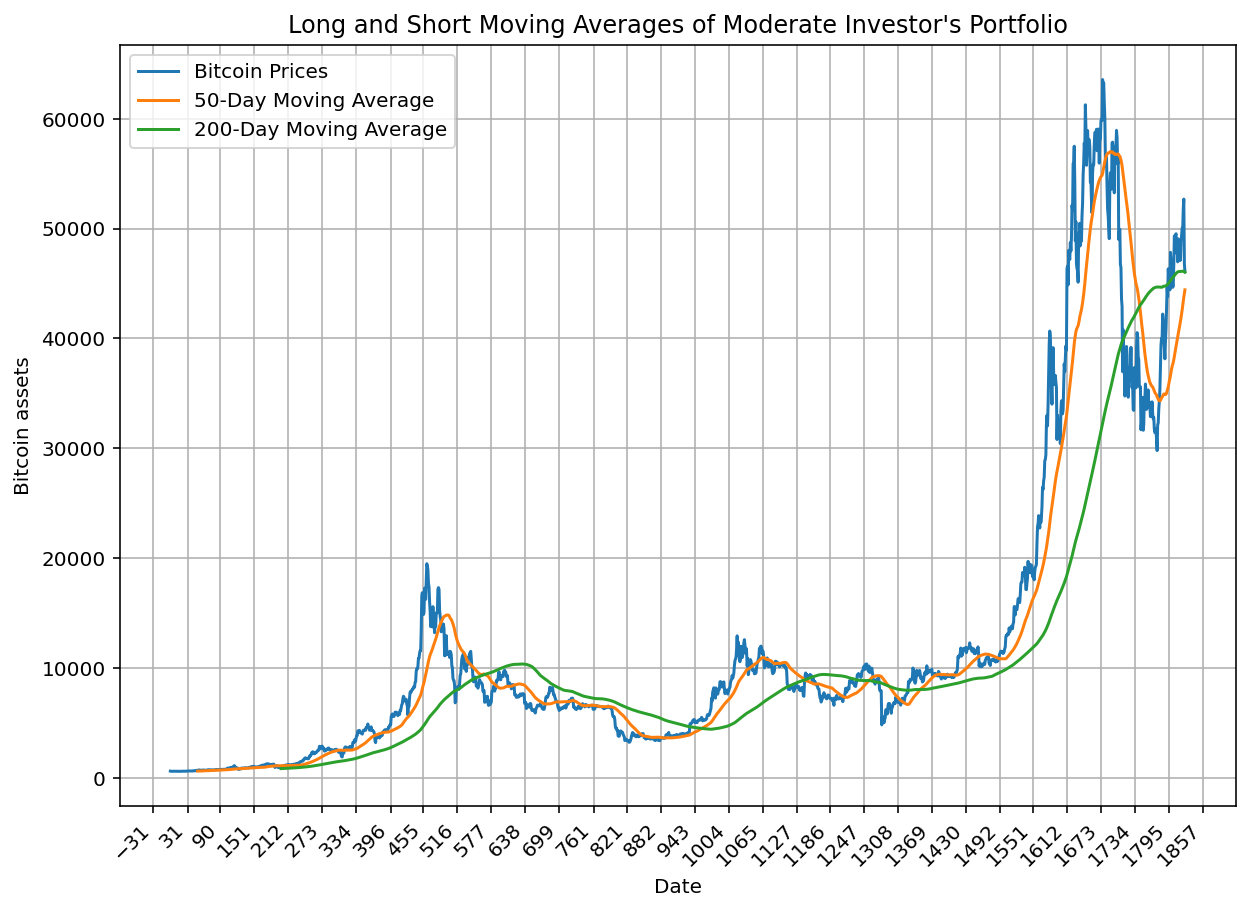

In [203]:
short_window = 50
long_window = 200

dataset_moderate['short_mavg'] = dataset_moderate['Bitcoin_price'].rolling(short_window).mean()
dataset_moderate['long_mavg'] = dataset_moderate['Bitcoin_price'].rolling(long_window).mean()

plot_data = dataset_moderate[-2200:]
plt.figure(figsize=(10, 7))
dataset_moderate['bit'] = dataset_moderate['Bitcoin_price']*dataset_moderate['Bitcoin']
plt.title('Long and Short Moving Averages', fontsize=14)
ax = plt.gca()

ax.set(xlabel="Date", ylabel='Bitcoin assets', title="Long and Short Moving Averages of Moderate Investor's Portfolio")
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

plt.plot(plot_data['Bitcoin_price'], label='Bitcoin Prices')
plt.plot(plot_data['short_mavg'], label='50-Day Moving Average')
plt.plot(plot_data['long_mavg'], label='200-Day Moving Average')
plt.legend()
plt.grid()

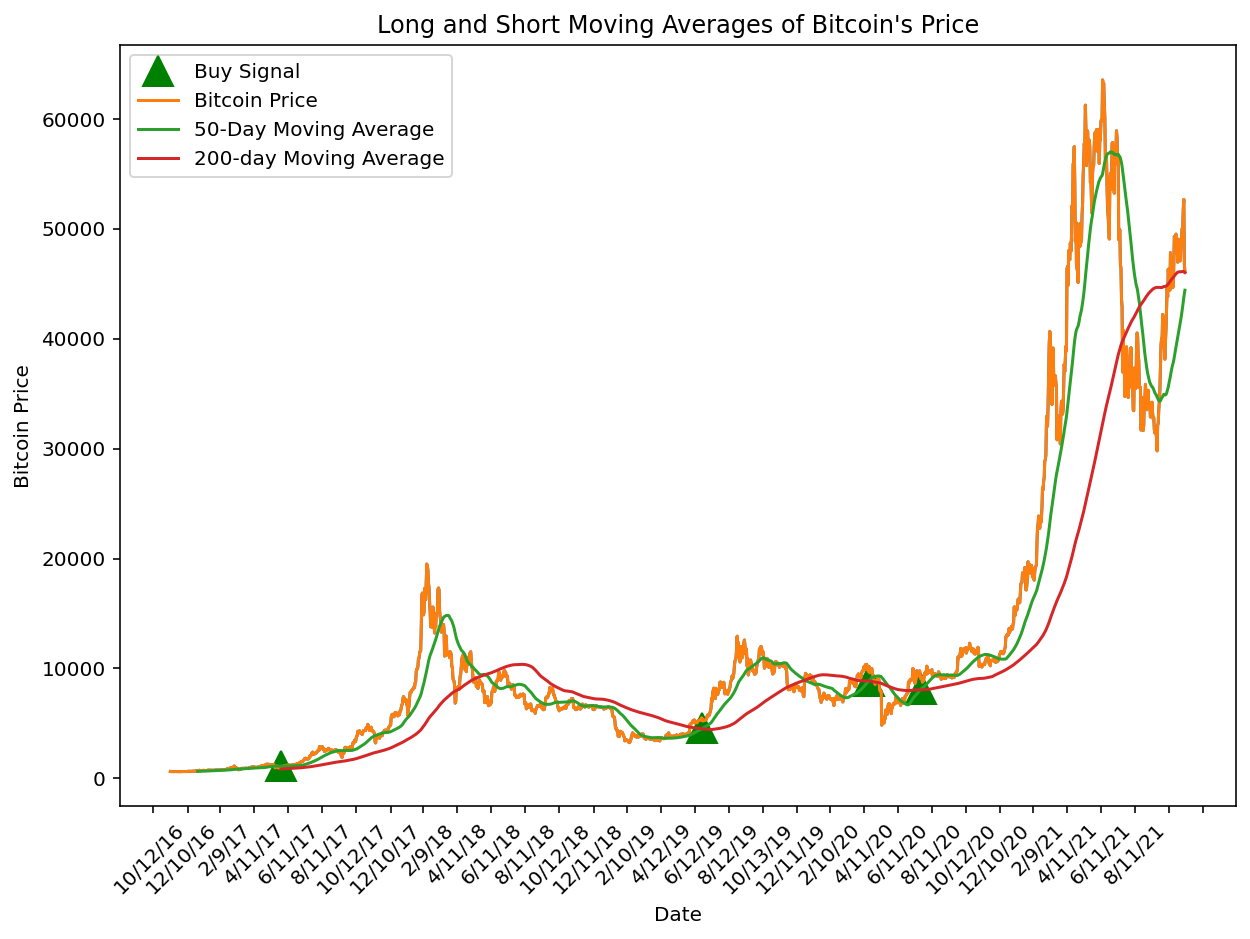

In [204]:
# Take long positions
dataset_moderate['long_positions'] = np.where(dataset_moderate['short_mavg'] > dataset_moderate['long_mavg'], 1, 0)

# dataset_moderate['positions'] = dataset_moderate['long_positions'] #+ dataset_moderate['short_positions'] 

# Plot close price and moving averages
# plot_data = dataset_moderate[-3000:]
plt.figure(figsize=(10, 7))
plt.title('Long and Short Signal', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price')

ax = plt.gca()
ax.plot(dataset_moderate['Date'], dataset_moderate['Bitcoin_price'])
ax.set(xlabel="Date", ylabel='Bitcoin Price', title="Long and Short Moving Averages of Bitcoin's Price")
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")
plt.plot(plot_data[(plot_data['long_positions'] == 1) &
                       (plot_data['long_positions'].shift(1) == 0)]['short_mavg'],
         '^', ms=15, label='Buy Signal', color='green')
plt.plot(plot_data['Bitcoin_price'], label='Bitcoin Price')
plt.plot(plot_data['short_mavg'], label='50-Day Moving Average')
plt.plot(plot_data['long_mavg'], label='200-day Moving Average')
plt.legend()
plt.savefig('moving_average_bitcoin_price.png')

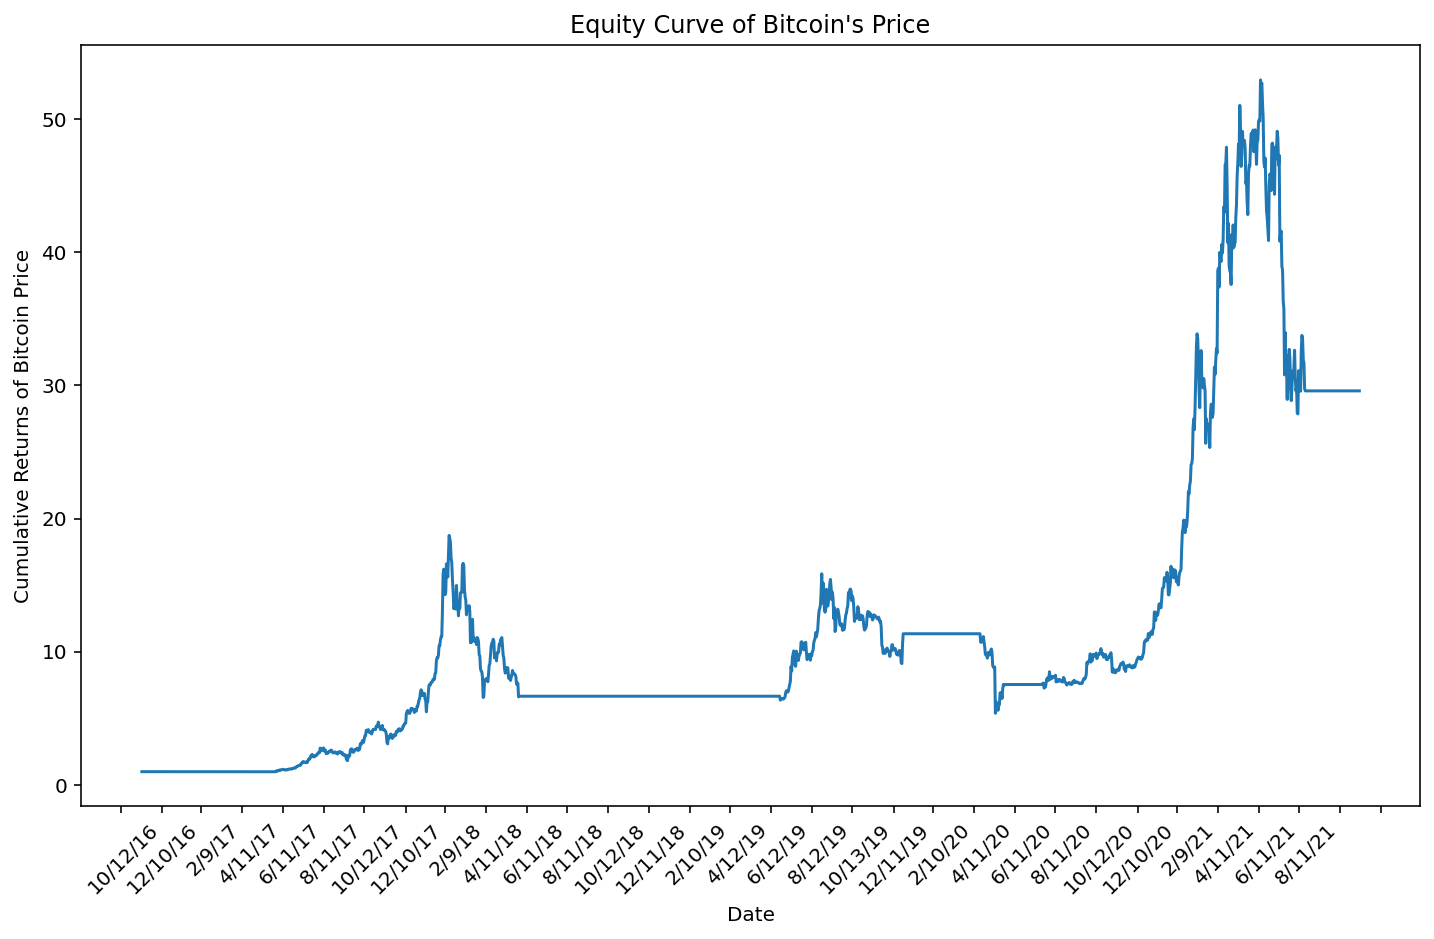

In [205]:
# Calculate daily returns
dataset_moderate['returns'] = dataset_moderate['Bitcoin_price'].pct_change()

# Calculate strategy returns
dataset_moderate['strategy_returns'] = dataset_moderate['returns'] * dataset_moderate['long_positions'].shift(1)

# Plot cumulative returns
cumulative_returns = (dataset_moderate['strategy_returns'] + 1).cumprod()
# cumulative_returns.plot(figsize=(10, 7))
ax = plt.gca()
ax.plot(dataset_moderate['Date'], cumulative_returns)
ax.set(xlabel="Date", ylabel='Cumulative Returns of Bitcoin Price', title="Equity Curve of Bitcoin's Price")
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")
plt.savefig('equity_curve_bitcoin_price.png')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


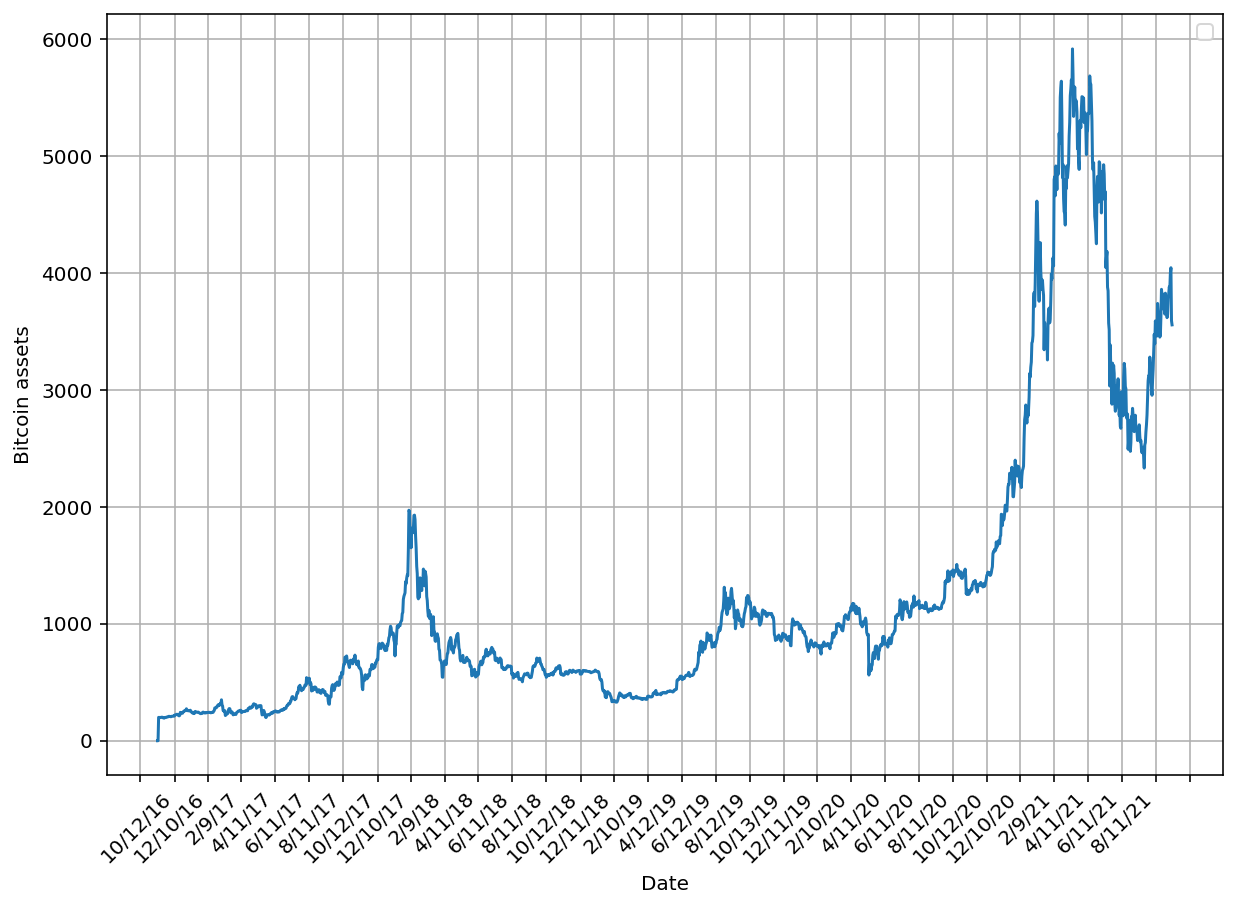

In [206]:
plt.figure(figsize=(10, 7))
dataset_moderate['bit'] = dataset_moderate['Bitcoin_price']*dataset_moderate['Bitcoin']
ax = plt.gca()
ax.plot(dataset_moderate['Date'], dataset_moderate['bit'])
ax.set(xlabel="Date", ylabel='Bitcoin assets')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")
plt.legend()
plt.grid()
plt.savefig('bit_asset.png')

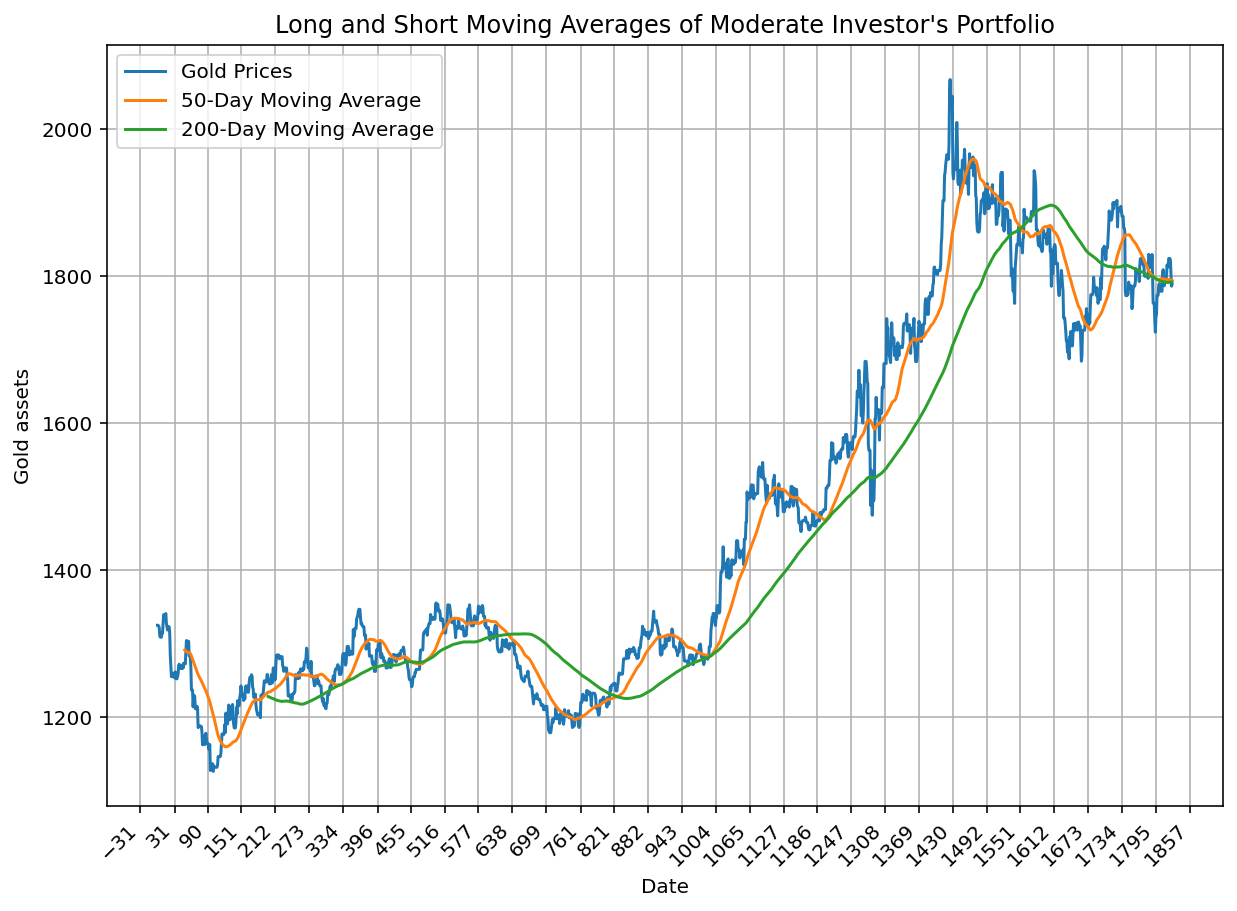

In [207]:
short_window = 50
long_window = 200

dataset_moderate['short_mavg'] = dataset_moderate['Gold_price'].rolling(short_window).mean()
dataset_moderate['long_mavg'] = dataset_moderate['Gold_price'].rolling(long_window).mean()

plot_data = dataset_moderate[-2200:]
plt.figure(figsize=(10, 7))
dataset_moderate['gld'] = dataset_moderate['Gold_price']*dataset_moderate['Gold']
plt.title('Long and Short Moving Averages', fontsize=14)
ax = plt.gca()

ax.set(xlabel="Date", ylabel='Gold assets', title="Long and Short Moving Averages of Moderate Investor's Portfolio")
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

plt.plot(plot_data['Gold_price'], label='Gold Prices')
plt.plot(plot_data['short_mavg'], label='50-Day Moving Average')
plt.plot(plot_data['long_mavg'], label='200-Day Moving Average')
plt.legend()
plt.grid()

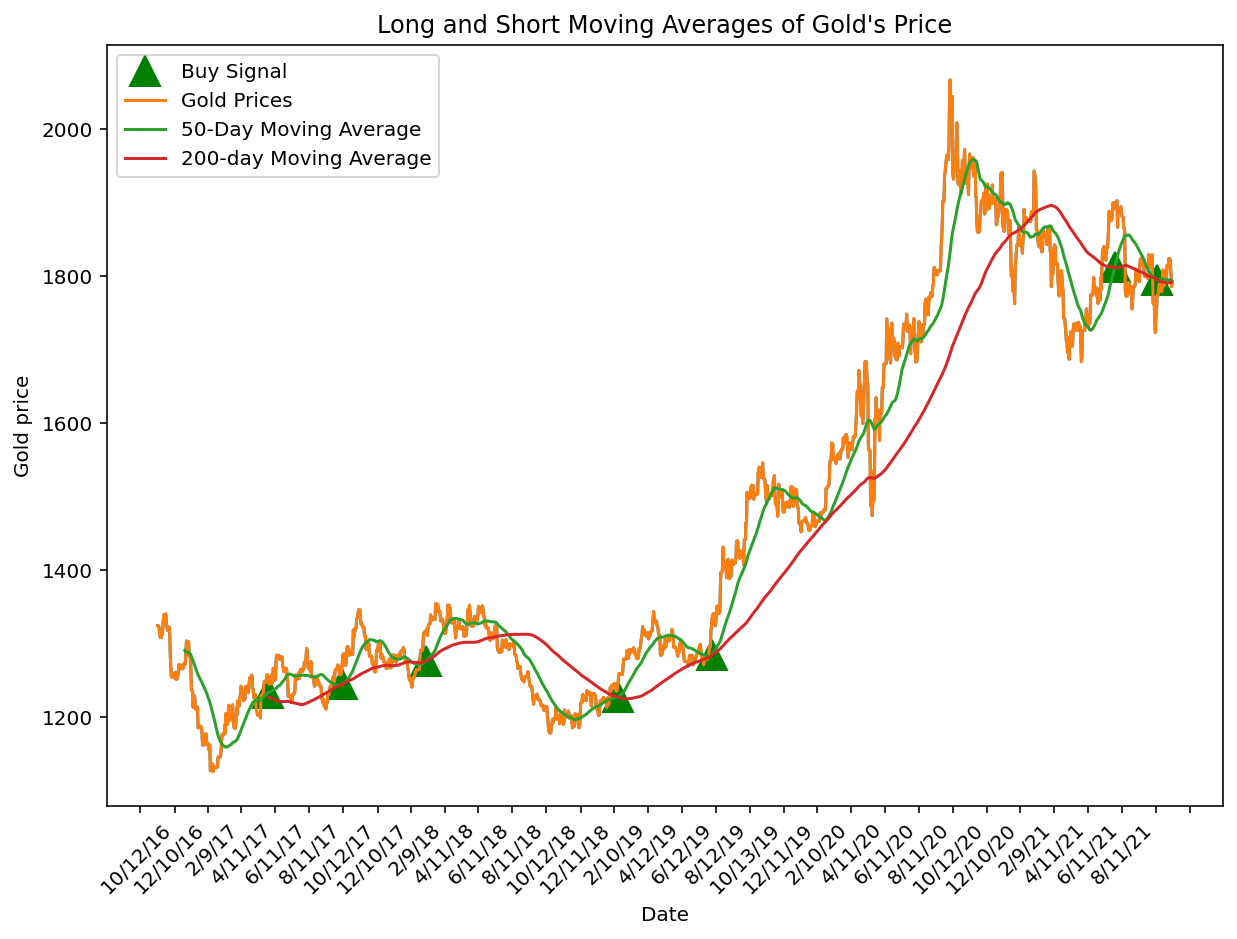

In [208]:
# Take long positions
dataset_moderate['long_positions'] = np.where(dataset_moderate['short_mavg'] > dataset_moderate['long_mavg'], 1, 0)

plt.figure(figsize=(10, 7))
plt.title('Long and Short Signal', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price')

ax = plt.gca()
ax.plot(dataset_moderate['Date'], dataset_moderate['Gold_price'])
ax.set(xlabel="Date", ylabel='Gold price', title="Long and Short Moving Averages of Gold's Price")
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")
plt.plot(plot_data[(plot_data['long_positions'] == 1) &
                       (plot_data['long_positions'].shift(1) == 0)]['short_mavg'],
         '^', ms=15, label='Buy Signal', color='green')

plt.plot(plot_data['Gold_price'], label='Gold Prices')
plt.plot(plot_data['short_mavg'], label='50-Day Moving Average')
plt.plot(plot_data['long_mavg'], label='200-day Moving Average')

plt.legend()
plt.savefig('moving_average_gold_price.png')

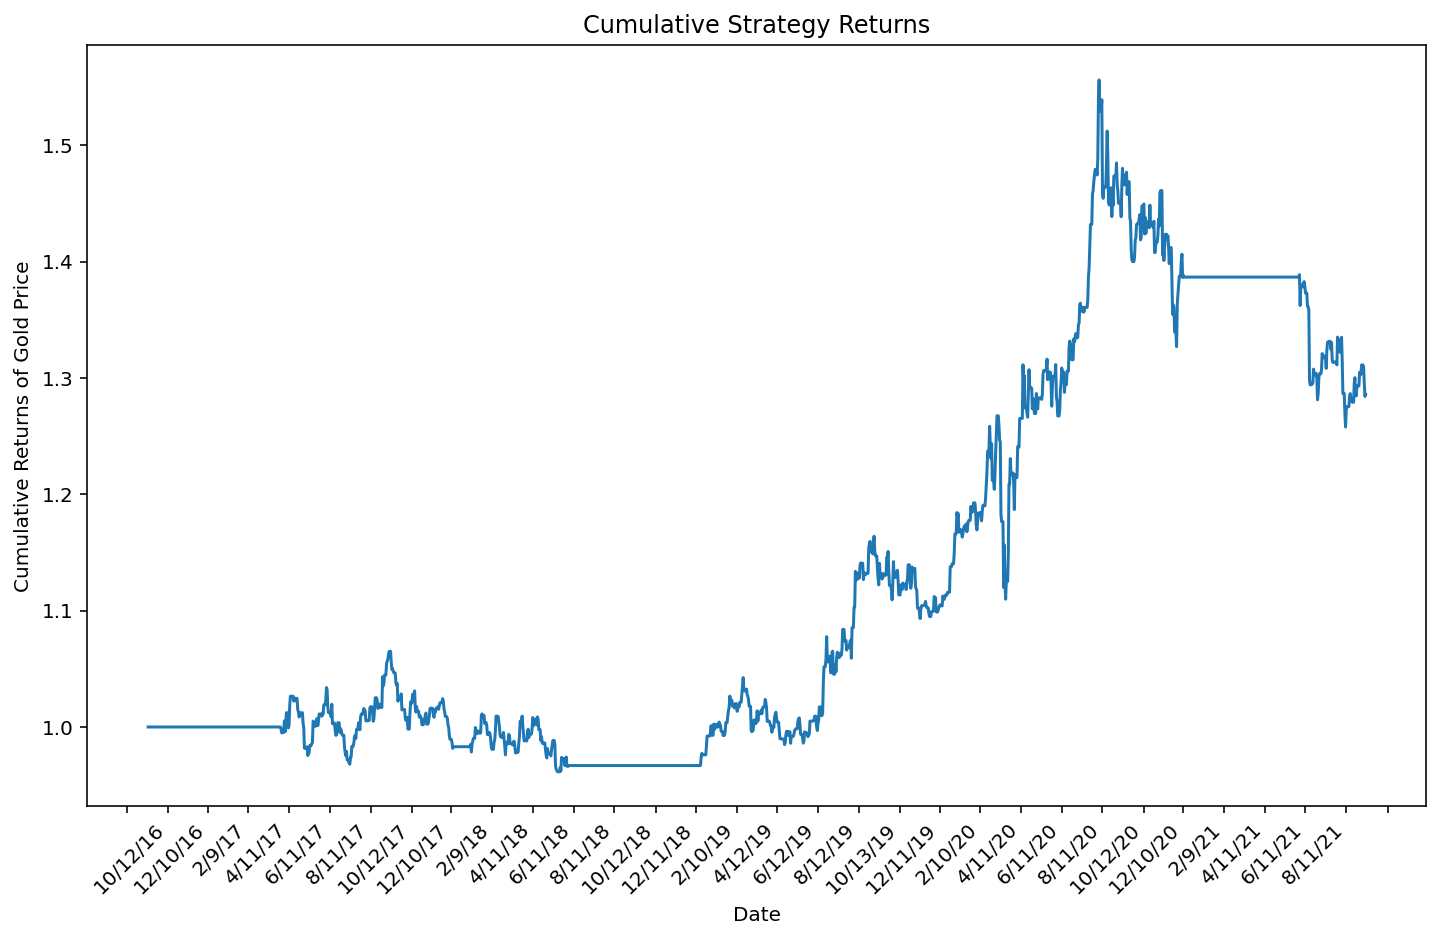

In [209]:
# Calculate daily returns
dataset_moderate['returns'] = dataset_moderate['Gold_price'].pct_change()

# Calculate strategy returns
dataset_moderate['strategy_returns'] = dataset_moderate['returns'] * dataset_moderate['long_positions'].shift(1)

# Plot cumulative returns
cumulative_returns = (dataset_moderate['strategy_returns'] + 1).cumprod()
# cumulative_returns.plot(figsize=(10, 7))
ax = plt.gca()
ax.plot(dataset_moderate['Date'], cumulative_returns)
ax.set(xlabel="Date", ylabel='Cumulative Returns of Gold Price', title="Equity Curve of Gold's Price")
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")
plt.title('Cumulative Strategy Returns')
plt.savefig('equity_curve_gold_price.png')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


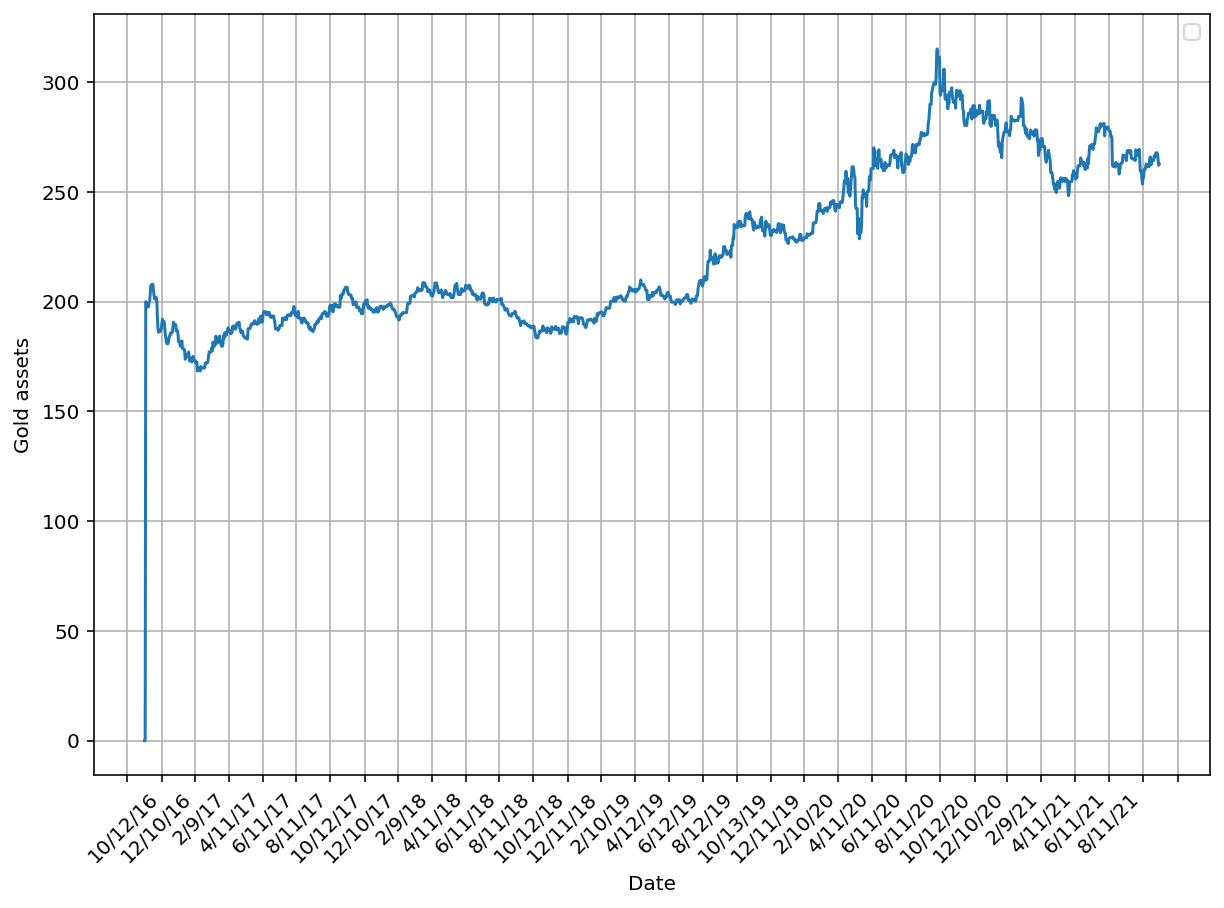

In [210]:
plt.figure(figsize=(10, 7))
dataset_moderate['gld'] = dataset_moderate['Gold_price']*dataset_moderate['Gold']
ax = plt.gca()
ax.plot(dataset_moderate['Date'], dataset_moderate['gld'])
ax.set(xlabel="Date", ylabel='Gold assets')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")
plt.legend()
plt.grid()
plt.savefig('gld_asset.png')